<a href="https://www.kaggle.com/code/erhanalasar/rfm-customer-segmentation-with-flo?scriptVersionId=180087073" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

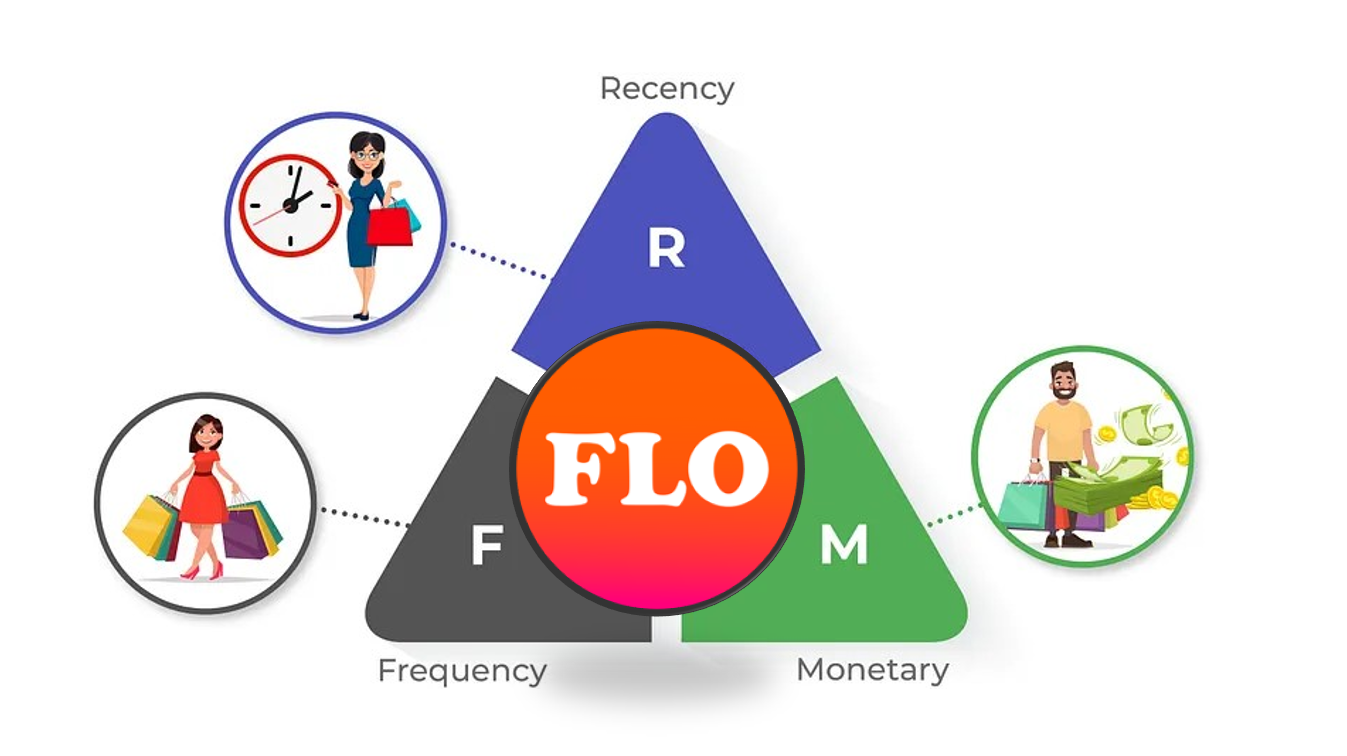

# Business Problem:
    FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments. For this purpose, customers' behaviors will be defined and groups will be formed according to the clusters in these behaviors.


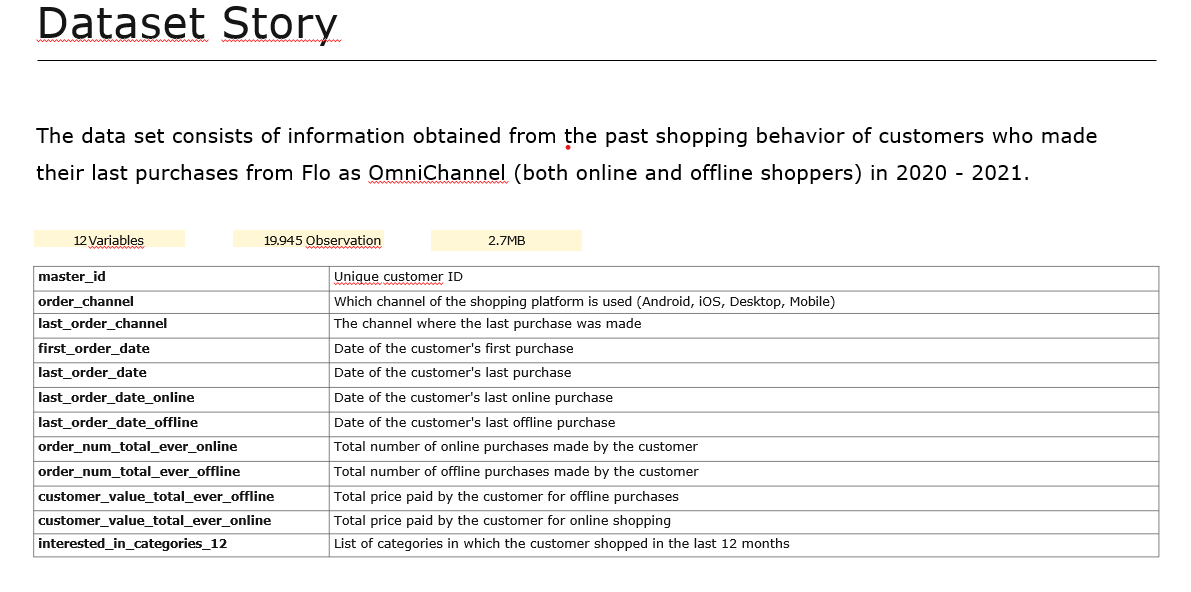

### Task 1 - Understanding and preparing Data
    Step1: Read the data flo_data_20K.csv. Make a copy of the dataframe.

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flo = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")
df = flo.copy()

# Step2: In the dataset
    a. Top 10 observations,
    b. Variable names,
    c. Descriptive statistics,
    d. NULL values,
    e. Examine the variable types.

In [3]:
# Top 10 Observatios
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [4]:
# Variable names
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [5]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [6]:
# Null Values
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [7]:
# Variable Types
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

# Step3: Omnichannel means that customers shop both online and offline. Each customer's total Create new variables for the number of purchases and expenditure.

In [8]:
df["omni_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["omni_customer_value"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

# Step4: Examine the variable types. Change the type of variables that express date to date.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [10]:
df["first_order_date"] = pd.to_datetime(df["first_order_date"])
df["last_order_date"] = pd.to_datetime(df["last_order_date"])
df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"])
df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"])

# Step5: Look at the distribution of the number of customers, total number of items purchased and total expenditure across shopping channels.

In [11]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omni_order_num,omni_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [12]:
df.groupby("order_channel").agg({"master_id": "count",
                                "omni_order_num":"sum",
                                "omni_customer_value":"sum"})

,master_id,omni_order_num,omni_customer_value
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


# Step6: List the top 10 most profitable customers.

In [13]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omni_order_num,omni_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55


In [14]:
df.groupby("master_id").agg({"omni_customer_value":"sum"}).sort_values(by="omni_customer_value",ascending=False)[0:10]

,omni_customer_value
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


# Step7: Rank the top 10 customers who placed the most orders.

In [15]:
df.groupby("master_id").agg({"omni_order_num":"sum"}).sort_values(by="omni_order_num",ascending=False)[0:10]

,omni_order_num
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


# Step8: Functionalize the data preparation process.

In [16]:
def rfm_preprocessing(dataframe):
    dataframe.dropna(inplace= True)
    dataframe[[col for col in dataframe.columns if 'date' in col]] = dataframe[[col for col in dataframe.columns if 'date' in col]].apply(pd.to_datetime)
    dataframe["omni_order_num"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["omni_customer_value"] = dataframe["customer_value_total_ever_online"] + dataframe["customer_value_total_ever_offline"]
    return dataframe

In [17]:
df = flo.copy()
df = rfm_preprocessing(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# Task 2: Calculating RFM Metrics
    Step 1: Define Recency, Frequency and Monetary.
    Step 2: Calculate Recency, Frequency and Monetary metrics for the customer.
    Step 3: Assign the metrics you calculated to a variable named rfm.
    Step 4: Change the names of the metrics you created to recency, frequency and monetary.

In [18]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omni_order_num,omni_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55


In [19]:
# Let's assume. We are analyzing this data two days later than the max order date
today_date = df["last_order_date"].max() + dt.timedelta(days=2)

In [20]:

rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days,
                                            'omni_order_num': lambda omni_order_num: omni_order_num.sum(),
                                            "omni_customer_value": lambda omni_customer_value: omni_customer_value.sum()})

In [21]:
rfm.head()

,last_order_date,omni_order_num,omni_customer_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


In [22]:
rfm.columns = ['recency', 'frequency', "monetary"]

# master_id'ler index olarak kaldı. Burayı aklında tut.

# Task 3: Calculating the RF Score
    Step 1: Convert Recency, Frequency and Monetary metrics into scores between 1-5 with qcut.
    Step 2: Save these scores as recency_score, frequency_score and monetary_score.
    Step 3: Express recency_score and frequency_score as a single variable and save them as RF_SCORE.

In [23]:
rfm["recency_score"] = pd.qcut(rfm["recency"], q=5, labels= ["5", "4", "3", "2", "1" ])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), q=5, labels = ["1", "2", "3", "4", "5"])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], q=5, labels = ["1", "2", "3", "4", "5"])

In [24]:
rfm["RF_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

# Task 4: Segmental Identification of the RF Score
    Step 1: Make segment definitions for the created RF scores.
    Step 2: Convert the scores into segments with the help of seg_map below.

In [25]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [26]:
rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)

# Task 5: Time for Action !
    Step1: Analyze the recency, frequnecy and monetary averages of the segments.
    Step2: With the help of RFM analysis, find the customers in the relevant profile for the 2 cases given below and save the customer ids as csv.
    
        a. FLO is adding a new women's footwear brand. The product prices of the new brand are determined by the general customer
    above their preferences. Therefore, for the promotion of the brand and product sales, it is important to work specifically with the customers in the profile that will be interested to get in touch. Shopping from loyal customers (champions, loyal_customers) and women category are customers to be contacted specially. Save the id numbers of these customers in the csv file.
    
        b. Up to 40% discount is planned for Men's and Children's products. In the past interested in the categories related to this discount customers who are good customers but have not been shopping for a long time, customers who should not be lost, dormant customers and new customers incoming customers want to be specifically targeted. Save the ids of the customers in the appropriate profile to csv file.

In [27]:
# a
women_category = df.loc[df["interested_in_categories_12"].str.contains("KADIN")]
loyals = rfm[rfm["segment"].isin(["champions", "loyal_customers"])]

In [28]:
loyal_women_category = women_category.merge(loyals, on="master_id", how="inner")
loyal_women_category = loyal_women_category[["master_id", "RF_SCORE", "segment"]]

In [29]:
loyal_women_category.to_csv("loyal_women_category.csv")

In [30]:
rfm.segment.unique()

array(['champions', 'hibernating', 'at_risk', 'potential_loyalists',
       'about_to_sleep', 'new_customers', 'need_attention',
       'loyal_customers', 'cant_loose', 'promising'], dtype=object)

In [31]:
#b
discount_candidates = rfm[rfm["segment"].isin(["cant_loose", "hibernating", "new_customers"])]
discount_candidates = discount_candidates.reset_index()

In [32]:
discount_candidates = discount_candidates[["master_id", "RF_SCORE", "segment"]]
discount_candidates.to_csv("discount_appliable.csv")